In [1]:
import os
import pathlib
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cwd = pathlib.Path.cwd()

if (cwd / ".git").is_dir():
    root_dir = cwd
else:
    root_dir = None
    for parent in cwd.parents:
        if (parent / ".git").is_dir():
            root_dir = parent
            break
sys.path.append(str(root_dir / "utils"))
from notebook_init_utils import bandicoot_check, init_notebook

root_dir, in_notebook = init_notebook()

profile_base_dir = bandicoot_check(
    pathlib.Path(os.path.expanduser("~/mnt/bandicoot")).resolve(), root_dir
)

In [2]:
platemap_dir = pathlib.Path(f"{profile_base_dir}/data").resolve()
drug_information_file_path = pathlib.Path(
    f"{root_dir}/data/drug_information.csv"
).resolve(strict=True)
drug_information = pd.read_csv(drug_information_file_path)
# get a list of all dirs within the dir
list_of_patients_file_path = pathlib.Path(
    f"{profile_base_dir}/data/patient_IDs.txt"
).resolve(strict=True)
figures_dir = pathlib.Path(f"{root_dir}/figures/drugs_figure/figures").resolve()
figures_dir.mkdir(parents=True, exist_ok=True)
patients_list = pd.read_csv(list_of_patients_file_path, header=None)[0].tolist()
patients_list.sort()
platemap_file_paths_list = [
    platemap_dir / f"{patient}/platemap/platemap.csv" for patient in patients_list
]
platemaps = pd.concat([pd.read_csv(path) for path in platemap_file_paths_list])
platemaps.drop_duplicates(inplace=True)
drugs = platemaps["treatment"].unique()
drugs.sort()

In [3]:
drugs_dict = {
    "drug": [],
    "FDA_status": [],
}
drugs_dict["drug"].append("ARV-825")
drugs_dict["FDA_status"].append("Investigational")
drugs_dict["drug"].append("Binimetinib")
drugs_dict["FDA_status"].append("Approved")
drugs_dict["drug"].append("Cabozantinib")
drugs_dict["FDA_status"].append("Approved")
drugs_dict["drug"].append("Copanlisib")
drugs_dict["FDA_status"].append("Withdrawn")
drugs_dict["drug"].append("Digoxin")
drugs_dict["FDA_status"].append("Approved")
drugs_dict["drug"].append("Everolimus")
drugs_dict["FDA_status"].append("Approved")
drugs_dict["drug"].append("Fimepinostat")
drugs_dict["FDA_status"].append("Phase 1/2")
drugs_dict["drug"].append("Imatinib")
drugs_dict["FDA_status"].append("Approved")
drugs_dict["drug"].append("Ketotifen")
drugs_dict["FDA_status"].append("Approved")
drugs_dict["drug"].append("Linsitinib")
drugs_dict["FDA_status"].append("Phase 3")
drugs_dict["drug"].append("Mirdametinib")
drugs_dict["FDA_status"].append("NF1 Approved")
drugs_dict["drug"].append("Nilotinib")
drugs_dict["FDA_status"].append("Approved")
drugs_dict["drug"].append("Onalespib")
drugs_dict["FDA_status"].append("Approved")
drugs_dict["drug"].append("Panobinostat")
drugs_dict["FDA_status"].append("Approved")
drugs_dict["drug"].append("Rapamycin")
drugs_dict["FDA_status"].append("Approved")
drugs_dict["drug"].append("Sapanisertib")
drugs_dict["FDA_status"].append("Phase 2")
drugs_dict["drug"].append("Selumetinib")
drugs_dict["FDA_status"].append("NF1 Approved")
drugs_dict["drug"].append("Staurosporine")
drugs_dict["FDA_status"].append("Withdrawn")
drugs_dict["drug"].append("Trabectedin")
drugs_dict["FDA_status"].append("Approved")
drugs_dict["drug"].append("Trametinib")
drugs_dict["FDA_status"].append("Approved")
drugs_dict["drug"].append("Vistusertib")
drugs_dict["FDA_status"].append("Withdrawn")
drugs_df = pd.DataFrame(drugs_dict, columns=["drug", "FDA_status"])
drugs_df["numerical_approval"] = drugs_df["FDA_status"].map(
    {
        "NF1 Approved": 5,
        "Approved": 4,
        "Phase 3": 3,
        "Phase 2": 2,
        "Phase 1/2": 1,
        "Investigational": 0,
        "Withdrawn": 0,
    }
)
drugs_df.sort_values(
    by=["numerical_approval", "drug"], ascending=[False, True], inplace=True
)
drugs_df.reset_index(drop=True, inplace=True)
drug_information
drugs_df = pd.merge(
    drugs_df,
    drug_information,
    how="left",
    left_on="drug",
    right_on="Treatment",
    validate="one_to_one",
)

In [4]:
# set custom colors for each MOA
custom_MOA_palette = {
    "Control": "#5a5c5d",
    "MEK1/2 inhibitor": "#882E8B",
    "HDAC inhibitor": "#1E6B61",
    "PI3K and HDAC inhibitor": "#2E6B8B",
    "PI3K inhibitor": "#0092E0",
    "receptor tyrosine kinase inhibitor": "#576A20",
    "tyrosine kinase inhibitor": "#646722",
    "mTOR inhibitor": "#ACE089",
    "IGF-1R inhibitor": "#ACE040",
    "HSP90 inhibitor": "#33206A",
    "Apoptosis induction": "#272267",
    "Na+/K+ pump inhibitor": "#A16C28",
    "histamine H1 receptor antagonist": "#3A8F00",
    "DNA binding": "#174F17",
    "BRD4 inhibitor": "#ff0000",
}

In [5]:
drugs_df["Target"].unique()
# order the dataframe by Target
drugs_df.sort_values(
    by=["numerical_approval", "Target", "drug"],
    ascending=[False, False, True],
    inplace=True,
)

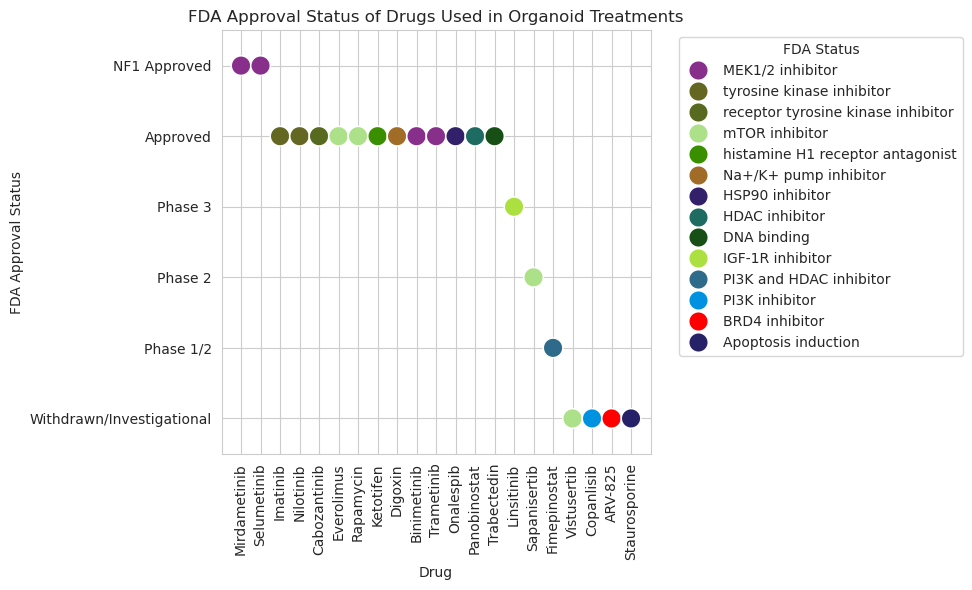

In [6]:
# plot the drug and the approval status as graph
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(
    data=drugs_df,
    x="drug",
    y="numerical_approval",
    hue="Target",
    palette=custom_MOA_palette,
    s=200,
)
plt.xticks(
    rotation=90,
    # ha="right"
)
plt.yticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Withdrawn/Investigational",
        "Phase 1/2",
        "Phase 2",
        "Phase 3",
        "Approved",
        "NF1 Approved",
    ],
)
plt.ylim(-0.5, 5.5)
plt.xlabel("Drug")
plt.ylabel("FDA Approval Status")
plt.title("FDA Approval Status of Drugs Used in Organoid Treatments")
plt.legend(title="FDA Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig(figures_dir / "drug_fda_approval_status.png", dpi=600)
plt.show()